# Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [ ]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt


IMG_SIZE = 250
width = 256
height = 202

def load_dataset(path):
    X = np.array([])
    y = np.array([])
    
    classes = ['COVID', 'non-COVID']
    for c in classes:
      files = glob.glob(path + c + "/*.png")
      for f in files: 
          print(f)
          img = cv2.imread(f)
          img = cv2.resize (img,(width,height))
          if X.size == 0:
              X = np.array([img])
          else:
              X = np.vstack([X,[img]])
          y = np.append(y,c)
    return (X,y)




In [ ]:
X, Y = load_dataset("/content/drive/MyDrive/SARS-COV/")

/content/drive/MyDrive/SARS-COV/COVID/Covid (274).png
/content/drive/MyDrive/SARS-COV/COVID/Covid (252).png
/content/drive/MyDrive/SARS-COV/COVID/Covid (218).png
/content/drive/MyDrive/SARS-COV/COVID/Covid (1250).png
/content/drive/MyDrive/SARS-COV/COVID/Covid (149).png
/content/drive/MyDrive/SARS-COV/COVID/Covid (123).png
/content/drive/MyDrive/SARS-COV/COVID/Covid (234).png
/content/drive/MyDrive/SARS-COV/COVID/Covid (178).png
/content/drive/MyDrive/SARS-COV/COVID/Covid (1228).png
/content/drive/MyDrive/SARS-COV/COVID/Covid (169).png
/content/drive/MyDrive/SARS-COV/COVID/Covid (236).png
/content/drive/MyDrive/SARS-COV/COVID/Covid (23).png
/content/drive/MyDrive/SARS-COV/COVID/Covid (258).png
/content/drive/MyDrive/SARS-COV/COVID/Covid (129).png
/content/drive/MyDrive/SARS-COV/COVID/Covid (161).png
/content/drive/MyDrive/SARS-COV/COVID/Covid (1223).png
/content/drive/MyDrive/SARS-COV/COVID/Covid (130).png
/content/drive/MyDrive/SARS-COV/COVID/Covid (1233).png
/content/drive/MyDrive/SA

# **Chia dữ liệu thành train,dev,test**

In [ ]:
from sklearn.model_selection import train_test_split
# train,dev,test (7,1,2)
X_train,X_1, y_train, y_1 = train_test_split(X,Y, test_size = 1/3, random_state = 40)

In [ ]:
X_dev,X_test, y_dev, y_test = train_test_split(X_1,y_1, test_size = 1/3, random_state = 40)

In [ ]:
X_train.shape

(1654, 202, 256, 3)

In [ ]:
X_dev.shape

(551, 202, 256, 3)

In [ ]:
X_test.shape

(276, 202, 256, 3)

# Preprocessing 1

In [ ]:
def transform_img(img):
  # Chuyển về ảnh màu xám 
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  # Làm mờ
  blur = cv2.GaussianBlur(gray_img, (5,5), cv2.BORDER_DEFAULT)

  return blur

In [ ]:
X_train_1 = np.array([])

for i in X_train:
  
  if X_train_1.size == 0:
              X_train_1 = np.array([transform_img(i)])
  else:
              X_train_1 = np.vstack([X_train_1,[transform_img(i)]])


In [ ]:
X_train_1.shape

(1654, 202, 256)

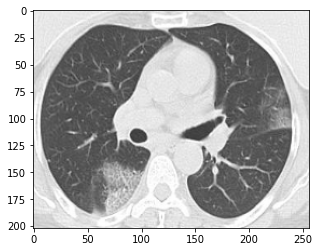

In [ ]:
plt.imshow(X_train[0])

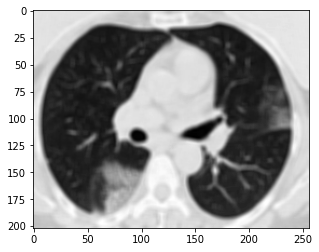

In [ ]:
plt.imshow(X_train_1[0], cmap = 'gray')

In [ ]:
X_dev_1 = np.array([])

for i in X_dev:
  if X_dev_1.size == 0:
              X_dev_1 = np.array([transform_img(i)])
  else:
              X_dev_1 = np.vstack([X_dev_1,[transform_img(i)]])

In [ ]:
X_dev_1.shape

(551, 202, 256)

In [ ]:
X_test_1 = np.array([])

for i in X_test:
  if X_test_1.size == 0:
              X_test_1 = np.array([transform_img(i)])
  else:
              X_test_1 = np.vstack([X_test_1,[transform_img(i)]])

In [ ]:
X_test_1.shape

(276, 202, 256)

In [ ]:
X_train.shape

(1654, 202, 256, 3)

In [ ]:
X_train_1.shape

(1654, 202, 256)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)
y1 = le.transform(y_train)
y2 = le.transform(y_dev)
y3 = le.transform(y_test)

In [ ]:
width = 202
height = 256



X1 = X_train_1.reshape(X_train_1.shape[0], width*height)
X2 = X_dev_1.reshape(X_dev_1.shape[0], width*height)
X3= X_test_1.reshape(X_test_1.shape[0],width*height)


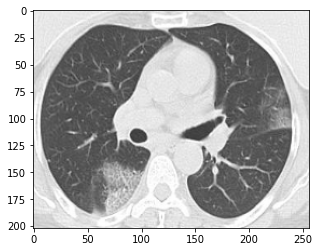

In [ ]:
plt.imshow(X_train[0])

# SVM

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
import time 

start_time = time.time()

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='scale')
SVM.fit(X1,y1)

print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

---- Mất 92.28222584724426 để huấn luyện mô hình ----


In [ ]:
svm_predict = SVM.predict(X3)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy: {}".format(accuracy_score(y3, svm_predict)))
print("Precision: ",str(precision_score(y3, svm_predict)))
print("Recall: " + str(recall_score(y3, svm_predict)))
print("F1-micro: " + str(f1_score(y3, svm_predict, average='micro')))
print("F1-macro: " + str(f1_score(y3, svm_predict, average='macro')))

cf = confusion_matrix(y3, svm_predict)
cr = classification_report(y3, svm_predict)

Accuracy: 0.8007246376811594
Precision:  0.8029197080291971
Recall: 0.7971014492753623
F1-micro: 0.8007246376811594
F1-macro: 0.8007220216606499


In [ ]:
Y_pred = []
Y_true = []
for i in range(len(y3)):
  pred = int(svm_predict[i])
  Y_pred.append(pred)
  true = int(y3[i])
  Y_true.append(true)

Text(0.5, 114.81999999999996, 'Predicted')

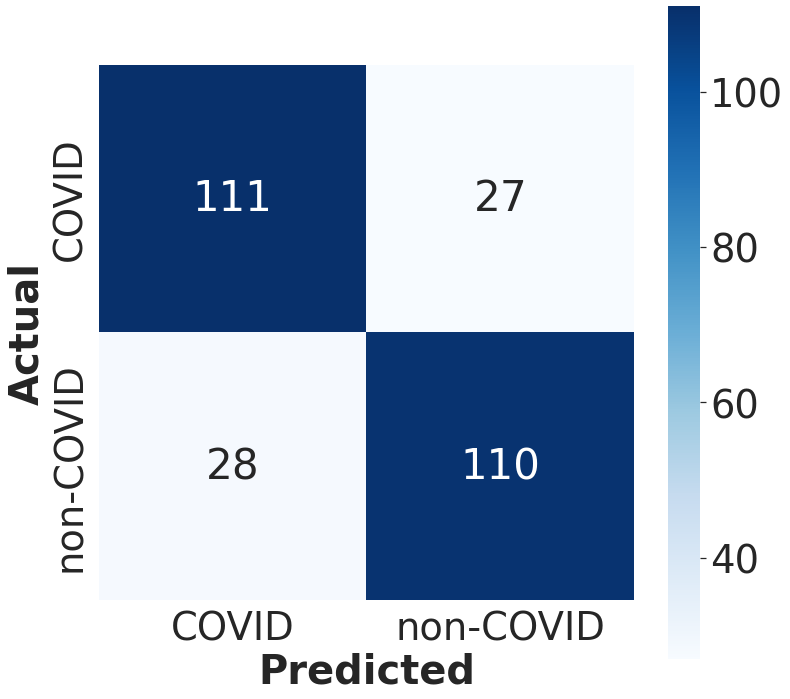

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


disease_types=['COVID', 'non-COVID']

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
sns.set(font_scale=3.5)
ax = sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types, fmt='g')
ax.set_ylabel('Actual', fontsize=40, fontweight='bold')
ax.set_xlabel('Predicted', fontsize=40, fontweight='bold')

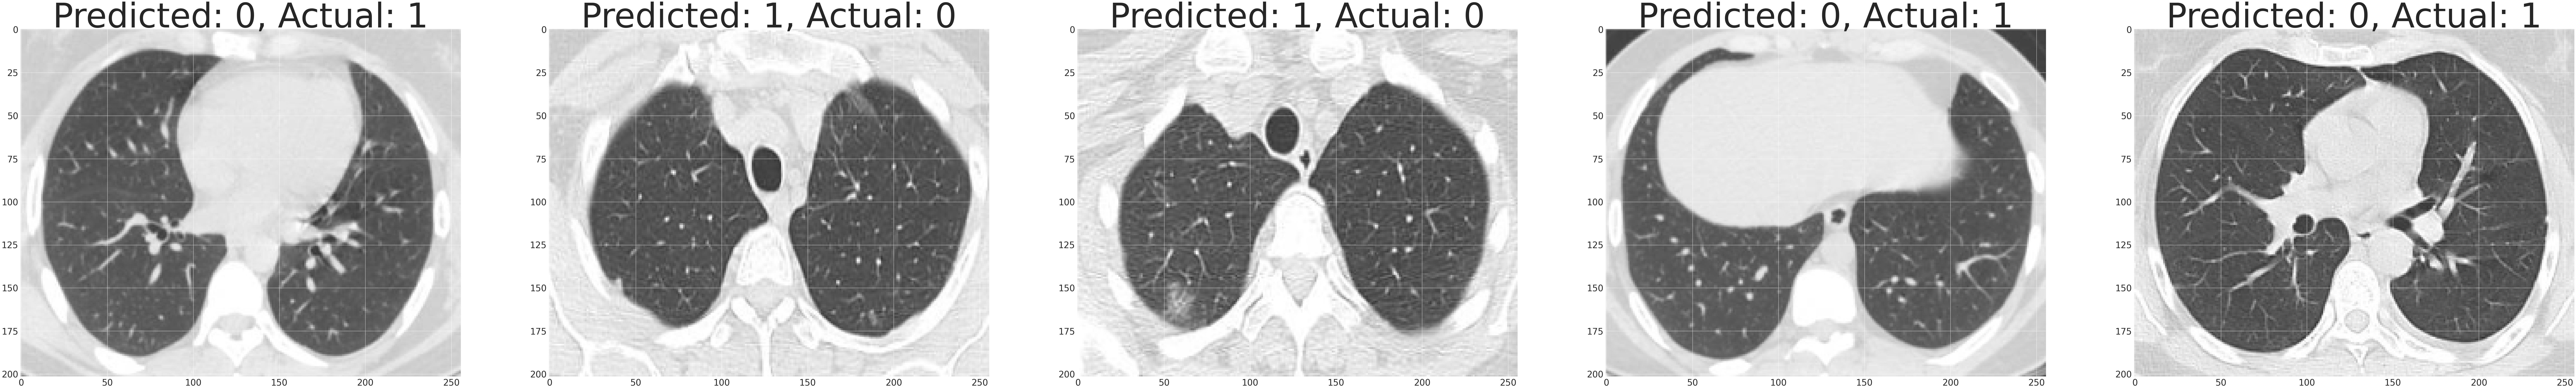

In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y3, svm_predict):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(202,250))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (202,256,3)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(svm_predict[badIndex], y3[badIndex]), fontsize = 150)



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

import time 

# fit the training dataset on the classifier
start_time = time.time()

clf = DecisionTreeClassifier(random_state=40,max_depth=100)

clf.fit(X1,y1)


print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

---- Mất 63.83623456954956 để huấn luyện mô hình ----


In [ ]:
clf_predict = clf.predict(X3)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy: {}".format(accuracy_score(y3, clf_predict)))
print("Precision: ",str(precision_score(y3, clf_predict)))
print("Recall: " + str(recall_score(y3, clf_predict)))
print("F1-micro: " + str(f1_score(y3, clf_predict, average='micro')))
print("F1-macro: " + str(f1_score(y3, clf_predict, average='macro')))

cf = confusion_matrix(y3, clf_predict)
cr = classification_report(y3, clf_predict)

Accuracy: 0.8007246376811594
Precision:  0.7862068965517242
Recall: 0.8260869565217391
F1-micro: 0.8007246376811594
F1-macro: 0.8005963718522995


Text(0.5, 114.81999999999996, 'Predicted')

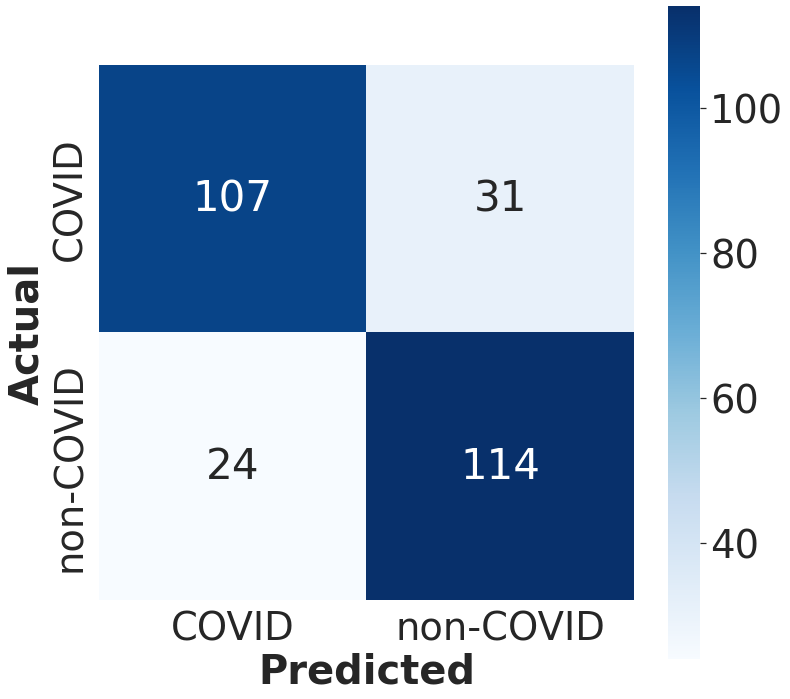

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = []
Y_true = []
for i in range(len(y3)):
  pred = int(clf_predict[i])
  Y_pred.append(pred)
  true = int(y3[i])
  Y_true.append(true)


disease_types=['COVID', 'non-COVID']

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
sns.set(font_scale=3.5)
ax = sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types, fmt='g')
ax.set_ylabel('Actual', fontsize=40, fontweight='bold')
ax.set_xlabel('Predicted', fontsize=40, fontweight='bold')

In [ ]:
cr

'              precision    recall  f1-score   support\n\n           0       0.82      0.78      0.80       138\n           1       0.79      0.83      0.81       138\n\n    accuracy                           0.80       276\n   macro avg       0.80      0.80      0.80       276\nweighted avg       0.80      0.80      0.80       276\n'

In [ ]:
cf

array([[107,  31],
       [ 24, 114]])

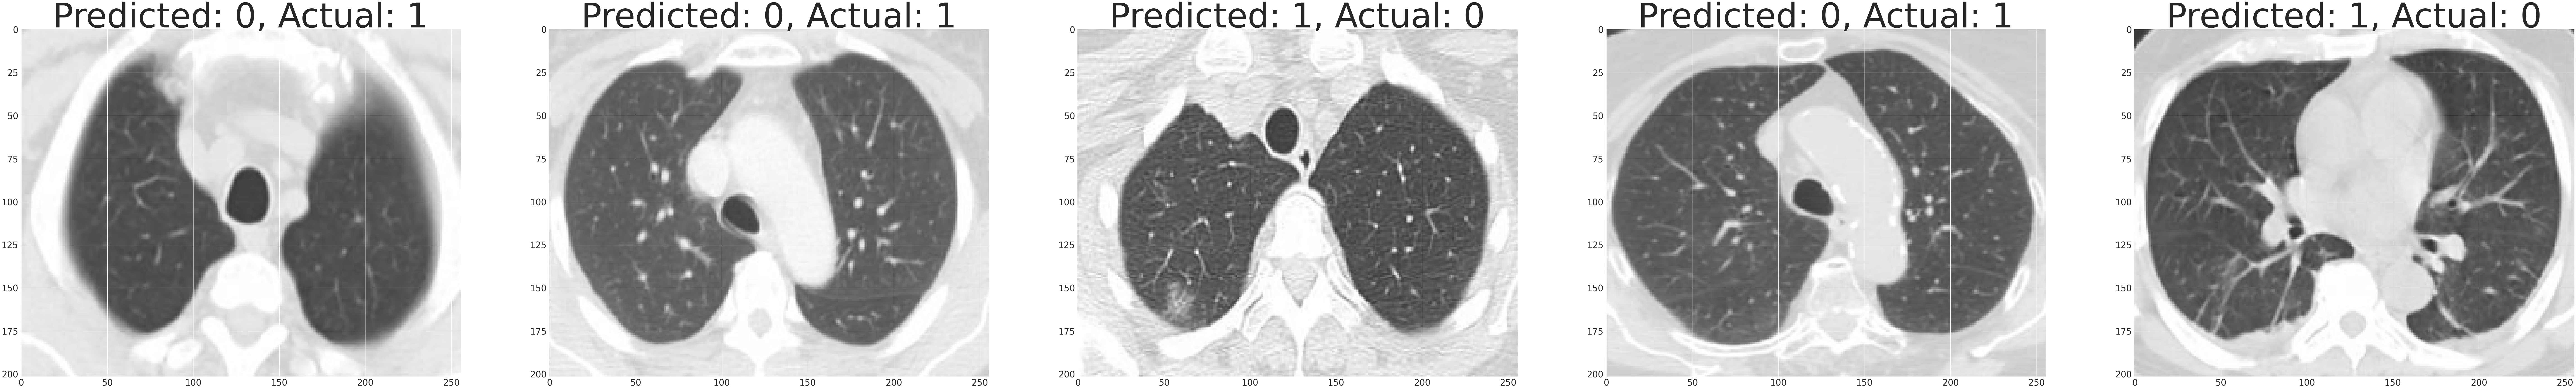

In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y3, clf_predict):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(202,250))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (202,256,3)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(clf_predict[badIndex], y3[badIndex]), fontsize = 150)


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 

import time 

# fit the training dataset on the classifier
start_time = time.time()

lr = LogisticRegression(C=10,random_state = 40)


lr.fit(X1,y1)

print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

---- Mất 20.697643995285034 để huấn luyện mô hình ----


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
lr_predict = lr.predict(X3)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy: {}".format(accuracy_score(y3, lr_predict)))
print("Precision: ",str(precision_score(y3, lr_predict)))
print("Recall: " + str(recall_score(y3, lr_predict)))
print("F1-micro: " + str(f1_score(y3, lr_predict, average='micro')))
print("F1-macro: " + str(f1_score(y3, lr_predict, average='macro')))

cf = confusion_matrix(y3, lr_predict)
cr = classification_report(y3, lr_predict)

Accuracy: 0.8007246376811594
Precision:  0.7902097902097902
Recall: 0.8188405797101449
F1-micro: 0.8007246376811594
F1-macro: 0.8006592165565785


In [ ]:
cr

'              precision    recall  f1-score   support\n\n           0       0.81      0.78      0.80       138\n           1       0.79      0.82      0.80       138\n\n    accuracy                           0.80       276\n   macro avg       0.80      0.80      0.80       276\nweighted avg       0.80      0.80      0.80       276\n'

In [ ]:
cf

array([[108,  30],
       [ 25, 113]])

Text(0.5, 114.81999999999996, 'Predicted')

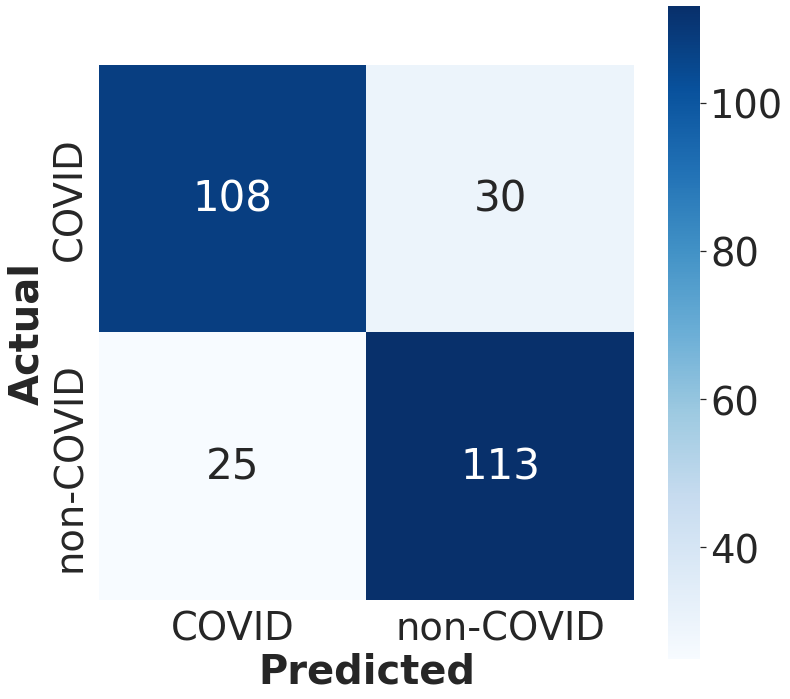

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = []
Y_true = []
for i in range(len(y3)):
  pred = int(lr_predict[i])
  Y_pred.append(pred)
  true = int(y3[i])
  Y_true.append(true)


disease_types=['COVID', 'non-COVID']

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
sns.set(font_scale=3.5)
ax = sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types, fmt='g')
ax.set_ylabel('Actual', fontsize=40, fontweight='bold')
ax.set_xlabel('Predicted', fontsize=40, fontweight='bold')

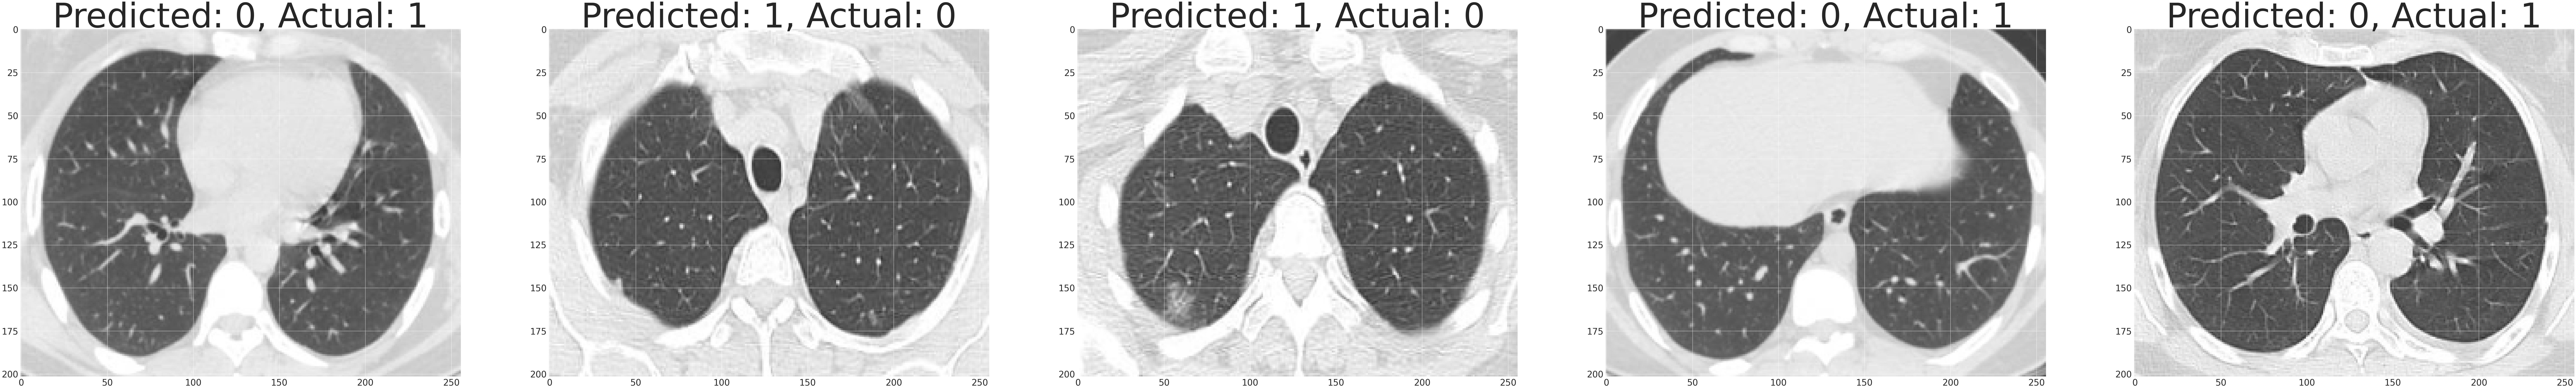

In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y3, lr_predict):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(202,250))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (202,256,3)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(lr_predict[badIndex], y3[badIndex]), fontsize = 150)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

import time 

# fit the training dataset on the classifier
start_time = time.time()

rfc = RandomForestClassifier(n_estimators=100,max_depth = 100,random_state = 45)


rfc.fit(X1,y1)

print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

---- Mất 24.675336122512817 để huấn luyện mô hình ----


In [ ]:
rfc_predict = rfc.predict(X3)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy: {}".format(accuracy_score(y3, rfc_predict)))
print("Precision: ",str(precision_score(y3, rfc_predict)))
print("Recall: " + str(recall_score(y3, rfc_predict)))
print("F1-micro: " + str(f1_score(y3, rfc_predict, average='micro')))
print("F1-macro: " + str(f1_score(y3, rfc_predict, average='macro')))

cf = confusion_matrix(y3, rfc_predict)
cr = classification_report(y3, rfc_predict)

Accuracy: 0.9021739130434783
Precision:  0.87248322147651
Recall: 0.9420289855072463
F1-micro: 0.9021739130434784
F1-macro: 0.9020182762474525


Text(0.5, 114.81999999999996, 'Predicted')

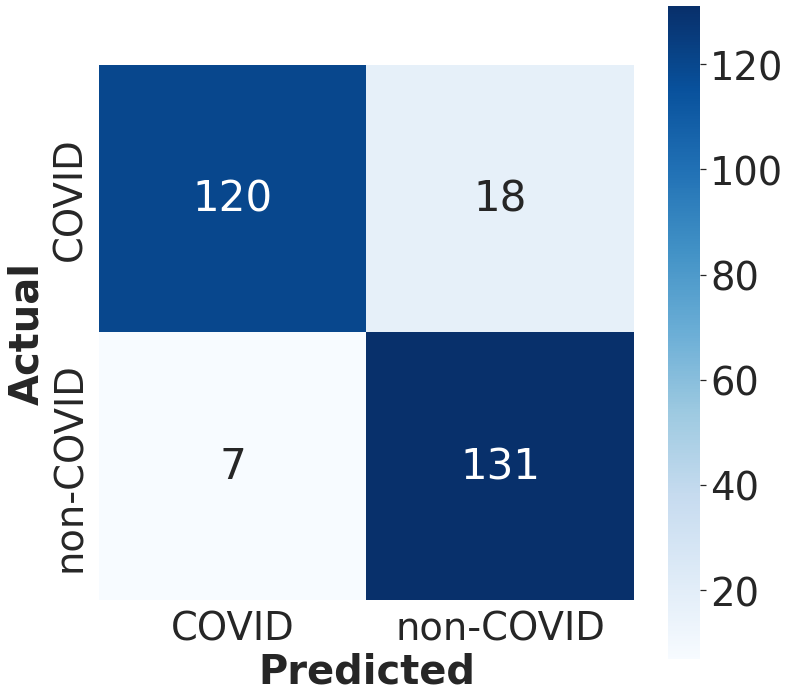

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = []
Y_true = []
for i in range(len(y3)):
  pred = int(rfc_predict[i])
  Y_pred.append(pred)
  true = int(y3[i])
  Y_true.append(true)


disease_types=['COVID', 'non-COVID']

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
sns.set(font_scale=3.5)
ax = sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types, fmt='g')
ax.set_ylabel('Actual', fontsize=40, fontweight='bold')
ax.set_xlabel('Predicted', fontsize=40, fontweight='bold')

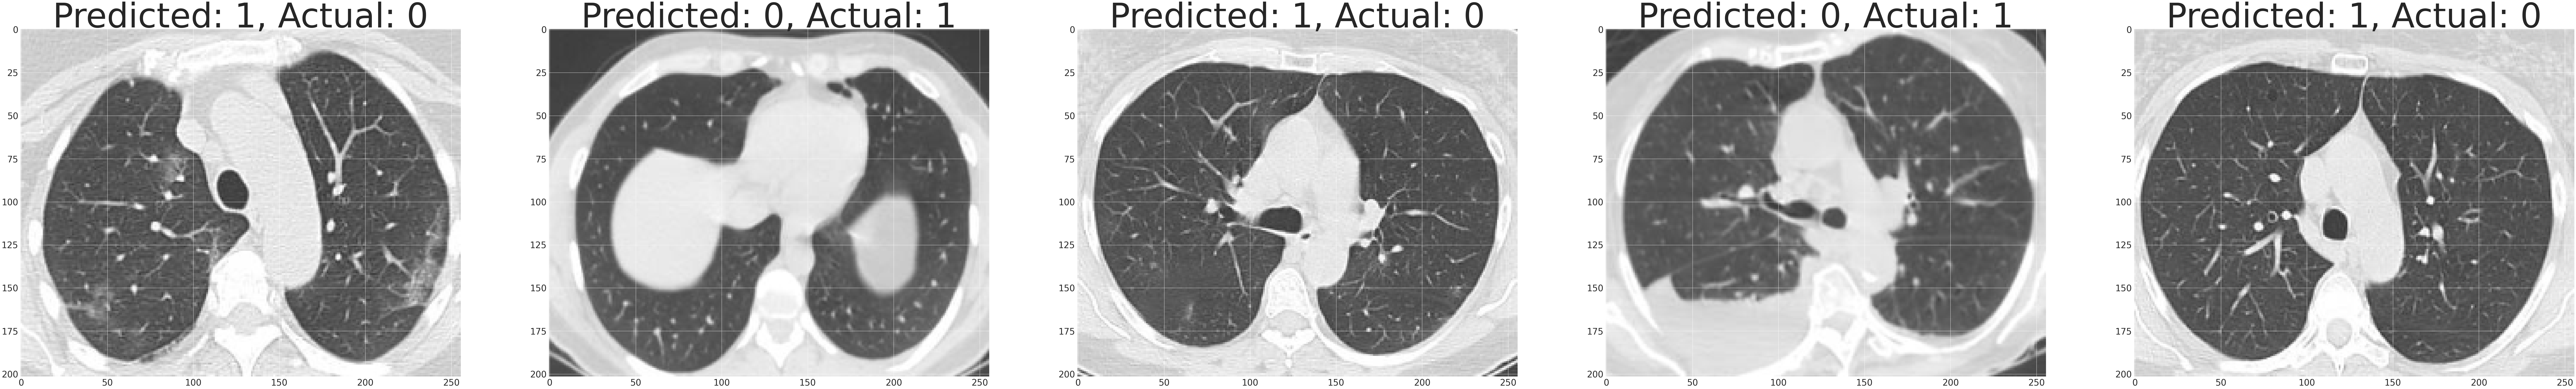

In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y3, rfc_predict):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(202,250))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[15:20]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (202,256,3)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(rfc_predict[badIndex], y3[badIndex]), fontsize = 150)